# 1.7 Network Graph Visualization

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Importing relationship data

relationship_df = pd.read_csv('Key_events_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Germany,43
1,Germany,Italy,42
2,Germany,Soviet Union,10
3,France,Italy,15
4,Germany,Japan,53
5,China,Japan,38
6,India,Japan,17
7,France,Japan,10
8,China,France,6
9,China,India,12


# creating a network object from the countries relationships dataframe.

In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Create a static network graph using only NetworkX.

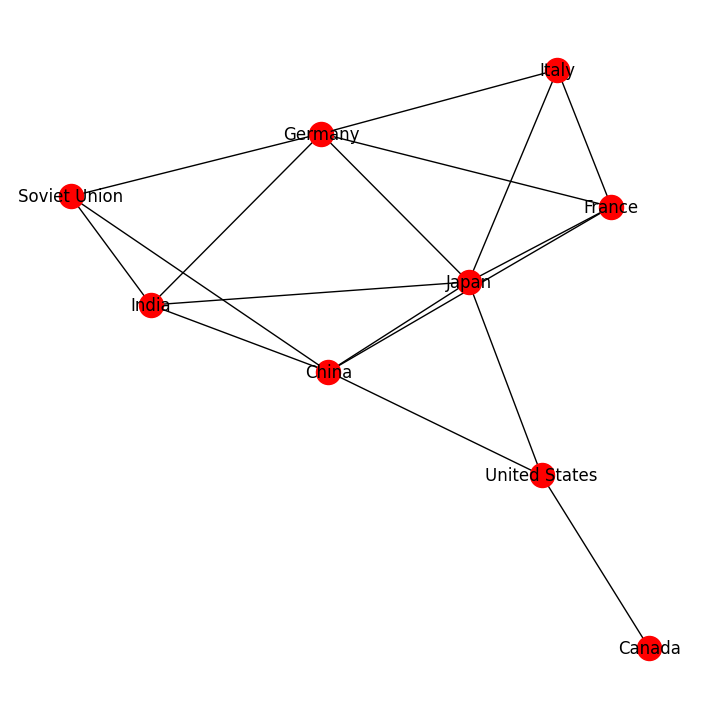

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_Key_events.png')

# Switching to pyvis and building an interactive network graph from the network object and saving as HTML File

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("Key_events.html")

Key_events.html


# Applying the Leiden algorithm to detect any communities within the countries.

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}


Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
new_com = coms.to_node_community_map()

In [11]:
new_com 

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Italy': [0],
             'Japan': [0],
             'Soviet Union': [1],
             'China': [1],
             'India': [1],
             'United States': [2],
             'Canada': [2]})

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
dict_com

{'France': 0,
 'Germany': 0,
 'Italy': 0,
 'Japan': 0,
 'Soviet Union': 1,
 'China': 1,
 'India': 1,
 'United States': 2,
 'Canada': 2}

In [14]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("Key_events_leiden.html")

Key_events_leiden.html


# the algorithm has picked up on the key events in the 20th century with Japan and Germany’s interactions with the other countries in their order of appearance in the text. The red group consists of Countries that show up early in the story but don’t do much later. The blue community represents the main countries active in the middle of the story (like Japan and Germany during WWII). The yellow community refers to Countries most active at the end, with China leading, which matches how China became more important late in the 20th century.

# The middle group (blue) connects the early group (red) and the late group (yellow), showing how power moved from old colonial powers to mid-century powers like Japan and Germany, and finally to late-century rising powers, with the early group fading while the middle and late groups kept strong links.

# the most important countries in Key_events_of_the_20th_century

In [15]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.5,
 'Germany': 0.625,
 'Italy': 0.375,
 'Soviet Union': 0.375,
 'Japan': 0.75,
 'China': 0.625,
 'India': 0.5,
 'United States': 0.375,
 'Canada': 0.125}

In [16]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [17]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

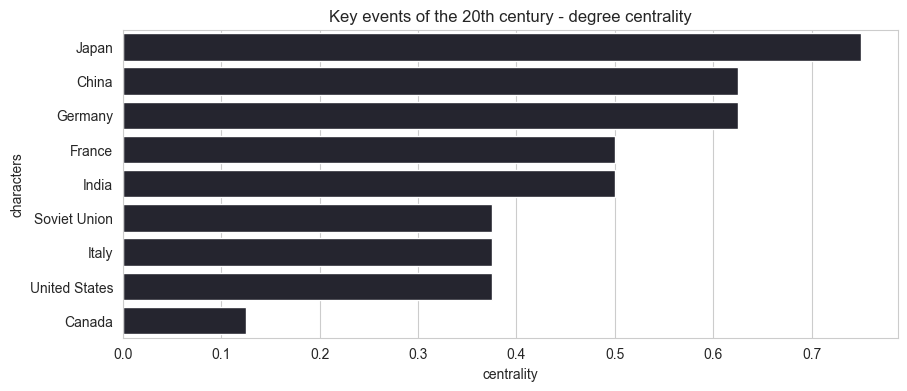

In [18]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("Key events of the 20th century - degree centrality")

# The bar chart shows that Japan has the highest degree of centrality. In other words, Japan has the most connections to other countries in the network. This isn’t surprising given Japan’s major role in the events described. Next are Germany and China, which also makes sense as they were key players during the century. Canada has the fewest connections, as seen in the network graph earlier.

In [19]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [20]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

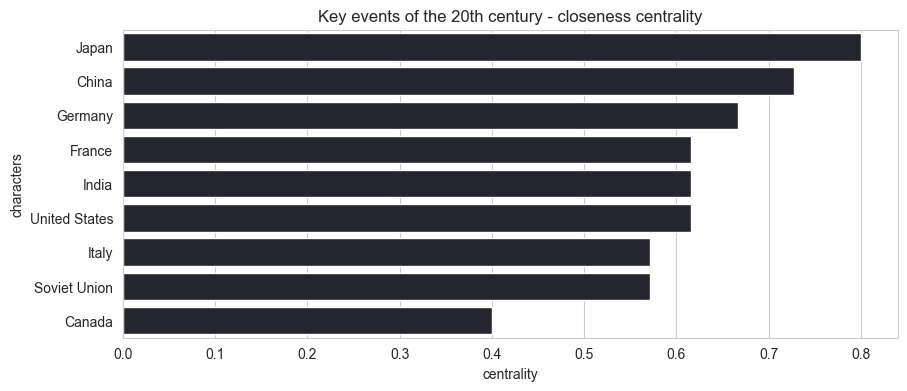

In [21]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("Key events of the 20th century - closeness centrality")

# The bar chart shows that Japan has the highest closeness centrality. In other words, Japan is the most central in terms of how quickly it can reach other countries in the network. This isn’t surprising given Japan’s strong links across different parts of the century’s events. Next are China and Germany, which also makes sense as they maintained connections with many other countries. Canada has the lowest closeness centrality, meaning it is the furthest from most countries in the network.

In [22]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [23]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

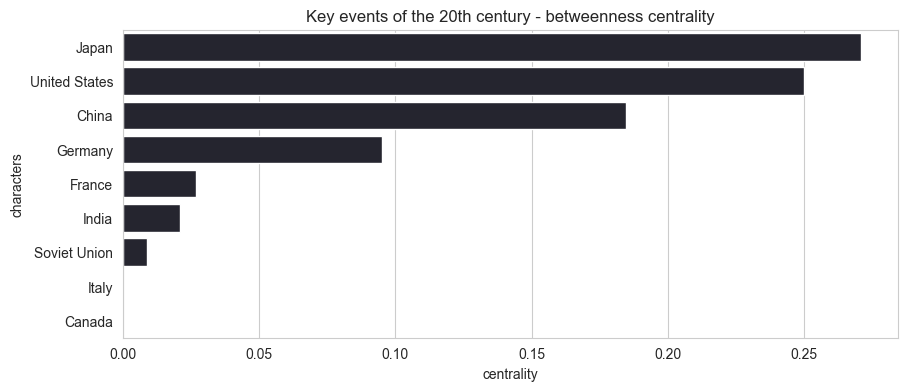

In [24]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Key events of the 20th century - betweenness centrality")

# The betweenness measure output reconfirms what the closeness centrality score established—specifically, that the most ”influential” country is Japan, followed by the United States and China. All the other characters score relatively low on this scale.

In [25]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')